# Red Wine Quality Prediction

#### Problem Statement
The dataset is related to red and white variants of the Portuguese"Vinho Verde" wine.Due to privacy and logistic issues,only physicochemical(inputs) and sensory(the output) variables are available(eg..there is no data about grape types wine brand wine selling price etc).

The dataset can be viewed as classification task.The classes are ordered and not balanced(e.g. there are many more normal wines than excellent or poor ones).Also,we are not sure if all input variables are relevant.SO it could be interesting to test feature selection methods.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.model_selection import train_test_split,cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df = pd.read_csv('winequality-red.csv')

# Seeing first 5 rows
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Observations

In [3]:
# Checking the dimensions
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can see that our dataset contains 1599 rows and 12 columns out of which 11 columns are of float datatype and one column is our integer datatype which is our target variable.From the non-null count we can also say that there is no null values in our dataset.

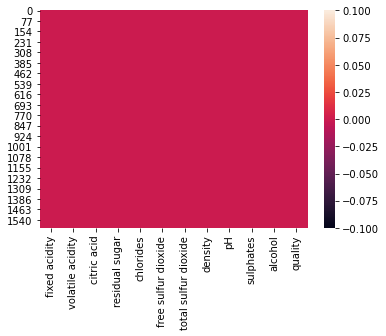

In [5]:
sns.heatmap(df.isnull())

BY using multivariate graph(heatmap) we confirmed that our dataset doesn't contain any null values.

In [6]:
# Let's check the mean,median and standard deviation values.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We can see that some of the variables contain outliers which are making the data more standard deviated.Let'scheck the nature of variables.

### Exploratory Data Analysis

In [7]:
sns.set_style('darkgrid')

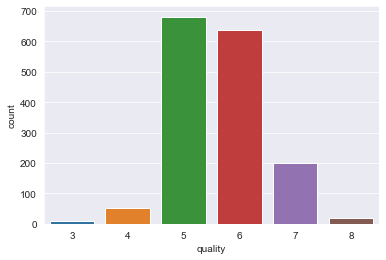

In [8]:
sns.countplot(df['quality'])

As using the countplot,we can see that our dataset is imbalanced,which will be a hinderance for our algorithm to accurate prediction.

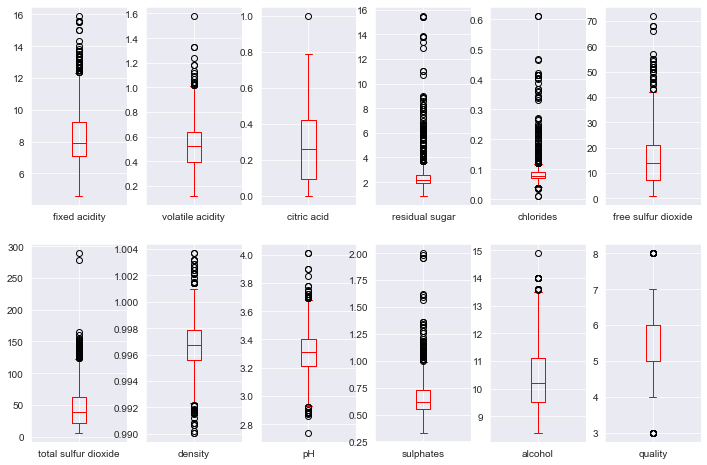

In [9]:
# Univariate Analysis
df.plot(kind='box', subplots=True, figsize=(12,8), layout=(2,6),color='red')

plt.show()

By uisng boxplot we find that some of the variables contains a few outliers like `citric acid`,`alcohol` and `quality`.While some variables contains a lot of outliers like `residual sugar`.`chlorides`,`sulphates,`.

Text(0.5, 1.0, 'fixed acidity vs quality')

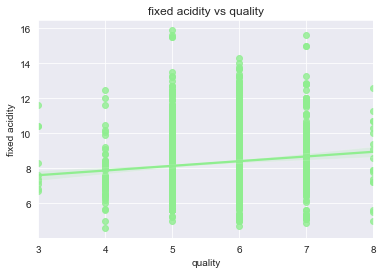

In [10]:
# Bivariate Analysis
sns.regplot(x='quality',y='fixed acidity',data=df,color='lightgreen')
plt.title("fixed acidity vs quality")

From the graph we can say that there are some outliers above 14 in fixed acidity and it also shows that as the fixed acidity increases there is slightly increase in the quality of wine. 

Text(0.5, 1.0, 'volatile acidity vs quality')

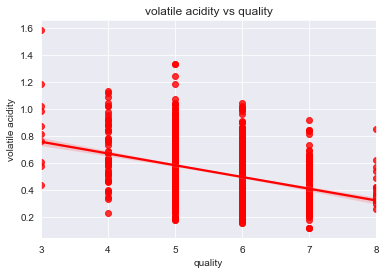

In [11]:
sns.regplot(x='quality',y='volatile acidity', data=df,color='red')
plt.title("volatile acidity vs quality")

From the graph we can say that there are some outliers near and above 1.2 in volatile acidity and we can clearly see that there is slightly negative relationship between the volatile acidity and the quality of wine.The decrease in volatile acidity will slighlty help in increasing quality of wine.

Text(0.5, 1.0, 'citric acid vs quality')

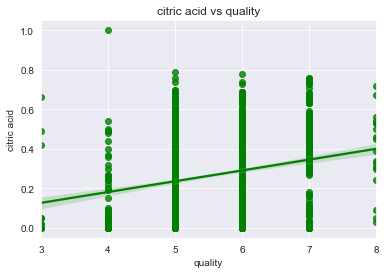

In [12]:
sns.regplot(x='quality',y='citric acid', data=df,color='green')
plt.title("citric acid vs quality")

From the graph we can see that an outlier is present in citric acid at 1.0.We can also see that slighlty positive linear relationship is present between citric acid and qualilty of wine.

Text(0.5, 1.0, 'residual sugar vs quality')

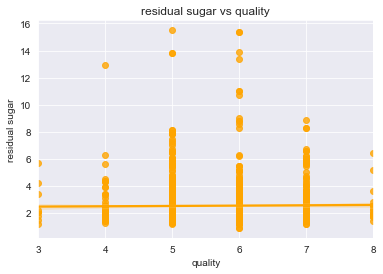

In [13]:
sns.regplot(x='quality',y='residual sugar', data=df,color='orange')
plt.title("residual sugar vs quality")

In the above graph we can see that the variable residual sugar contains a lot of outliers and there is `no relationship between residual sugar and quality of wine`,which means that this variable posses no effect on the quality of wine.

Text(0.5, 1.0, 'chlorides vs quality')

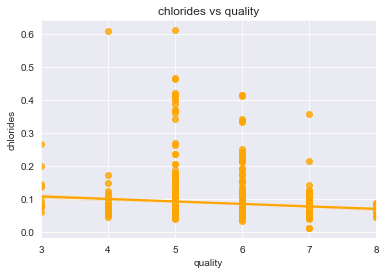

In [14]:
sns.regplot(x='quality',y='chlorides', data=df,color='orange')
plt.title("chlorides vs quality")

From the figure,we can say that the variable `chlorides` contains a lot of variables as like the residual sugar and the is slighlty negative relationship almost of null value,which does'nt effect the target variable much.

Text(0.5, 1.0, 'free sulfur dioxide vs quality')

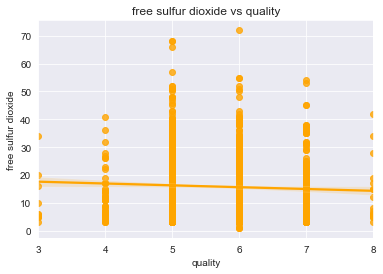

In [15]:
sns.regplot(x='quality',y='free sulfur dioxide', data=df,color='orange')
plt.title("free sulfur dioxide vs quality")

Some outliers are present in the variable `free supfur dioxide` and ther is almost null or slightly negative relationship between both of them, which have almost zero effect on the quality of wine.

Text(0.5, 1.0, 'total sulfur dioxide vs quality')

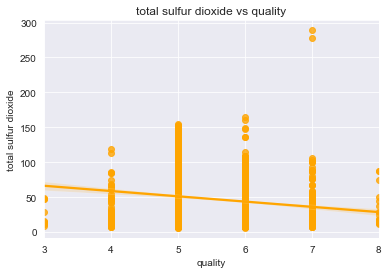

In [16]:
sns.regplot(x='quality',y='total sulfur dioxide', data=df,color='orange')
plt.title("total sulfur dioxide vs quality")

Again with a weak negative relationship the variable `total supfur dioxide` contains some outliers.

Text(0.5, 1.0, 'density vs quality')

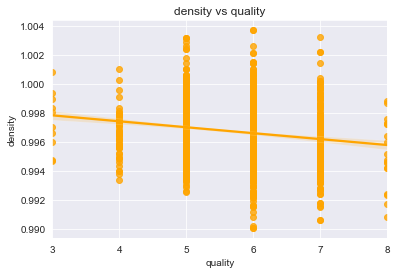

In [17]:
sns.regplot(x='quality',y='density', data=df,color='orange')
plt.title("density vs quality")

Text(0.5, 1.0, 'pH vs quality')

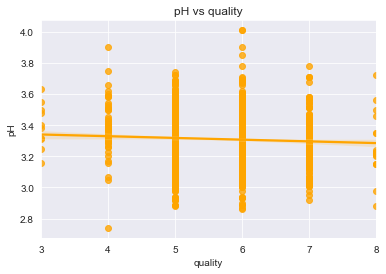

In [18]:
sns.regplot(x='quality',y='pH', data=df,color='orange')
plt.title("pH vs quality")

From the above graphs we can say that outliers are present on both the higher and lower end in variable `density` and `pH`,which posses a weak negative relationship almost equal to zero with the `quality` of wine.

Text(0.5, 1.0, 'sulphates vs quality')

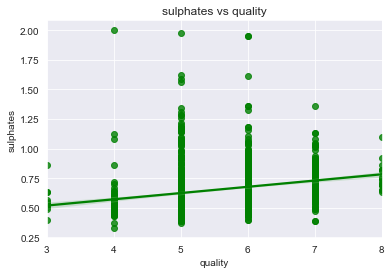

In [19]:
sns.regplot(x='quality',y='sulphates', data=df,color='green')
plt.title("sulphates vs quality")

The variable `sulphates` having some outliers and posses a weak degree of correaltion with the `quality of wine`.

Text(0.5, 1.0, 'alcohol vs quality')

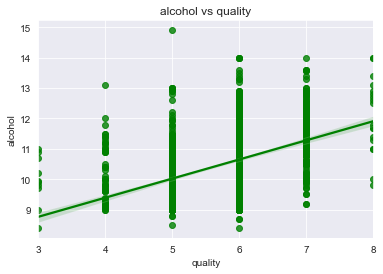

In [20]:
sns.regplot(x='quality',y='alcohol', data=df,color='green')
plt.title("alcohol vs quality")

From the graph we can conclude that among all the variables,`alcohol` shows better postive relationship with the `quality of wine`.All other variables are having a weak correlation with the target variable.So `alcohol` is the main explanatory variable for the determination of quality of wine.

In [21]:
# Multivariate analysis

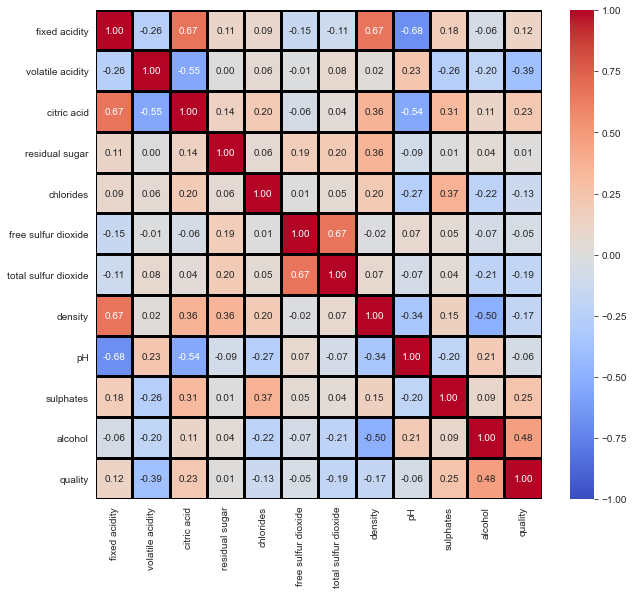

In [22]:
corr = df.corr()
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(corr,annot=True,fmt=".2f",ax=ax,vmin=-1,
            vmax=1, center= 0 ,cmap= 'coolwarm',linewidths=2, linecolor='black',
            xticklabels=corr.columns,yticklabels=corr.columns)


Here we can say that the observations done above are almost correct that` alcohol` is the only variable which is more postive correalated than others with` quality` variable.
Apart from this `cirtric acid` and `fixed acidity` ,`density` and `fixed acidity` ,  `total sulfur dioxide` and `free sulfur dioxide` posses correaltion among them respectively.

In [23]:
# Strong Positive correlation
p =corr[corr>0.75]
p

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


Here we can say that although `alcohol` is the most positive correalated with `quality of wine`,but this is also not so strongly correlated.

As Now we are done with `exploratory analysis` let's move towards cleaning the data.

### Data cleaning

As we have seen above that we are not having any missing values in our dataset, but we have outliers in our dataset.So let's deal with outliers.

In [24]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [25]:
from sklearn.preprocessing import PowerTransformer
pwt=PowerTransformer(method='yeo-johnson')
df[['fixed acidity']]=pwt.fit_transform(df[['fixed acidity']])
df[['volatile acidity']]=pwt.fit_transform(df[['volatile acidity']])
df[['residual sugar']]=pwt.fit_transform(df[['residual sugar']])
df[['chlorides']]=pwt.fit_transform(df[['chlorides']])
df[['free sulfur dioxide']]=pwt.fit_transform(df[['free sulfur dioxide']])
df[['total sulfur dioxide']]=pwt.fit_transform(df[['total sulfur dioxide']])
df[['sulphates']]=pwt.fit_transform(df[['sulphates']])
df[['alcohol']]=pwt.fit_transform(df[['alcohol']])


In [26]:
df.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.318337
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                 0.071288
pH                      0.193683
sulphates               0.009985
alcohol                 0.112372
quality                 0.217802
dtype: float64

So now ww had removed the skewness from our datset,which will helps us a lot.We can also check skewness using the graph below. Here we are not removing outliers because it will cause 10% data loss for us which is very huge data.So we cannot remove outliers.

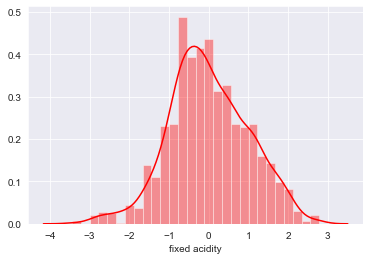

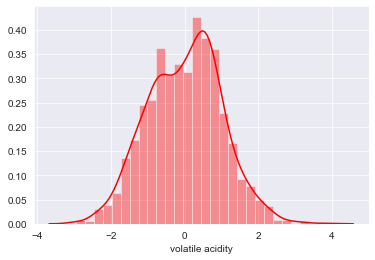

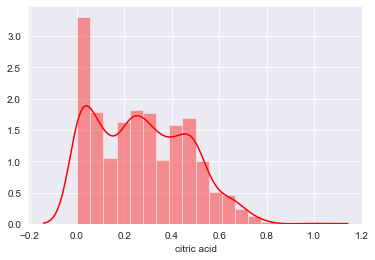

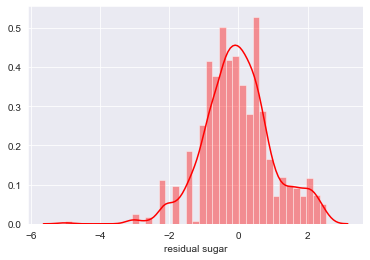

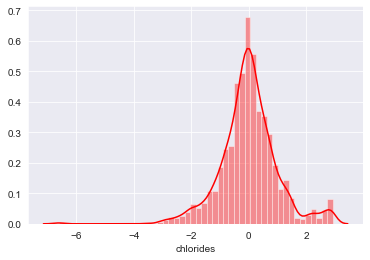

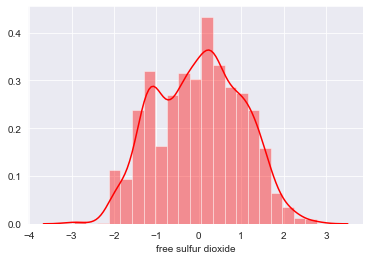

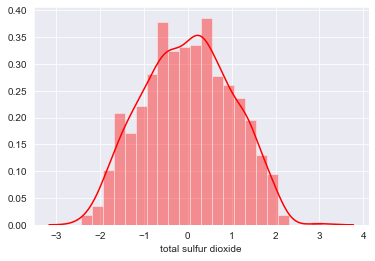

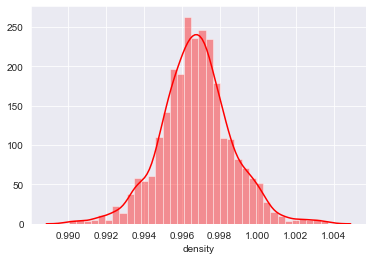

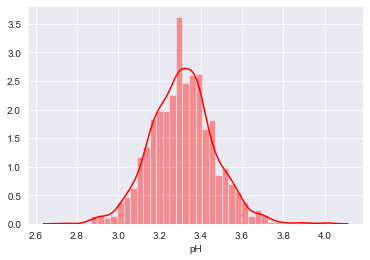

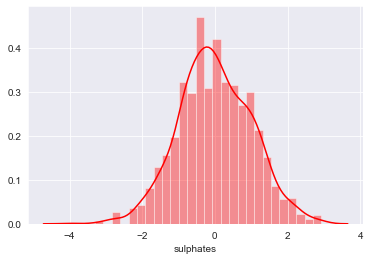

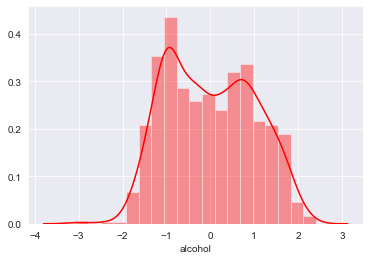

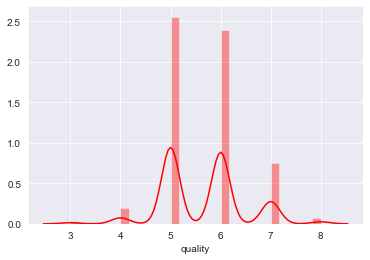

In [27]:
for i in df.columns:
    plt.subplots()
    sns.distplot(df[i],color='red')

In [28]:
print(df.shape)


(1599, 12)


### Feature Engineering
Converting the target variable

In [29]:
df['quality']=np.where(df['quality']>=7,1,0)

In [30]:
# Let's check now the values in quantity variable.
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

### Separate the dependent and independenet variables.

In [31]:
x=df.drop(columns='quality',axis=1)
y=df['quality']

from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state=42)
x_res,y_res = smk.fit_sample(x,y)

print(x_res.shape,y_res.shape)

from collections import Counter

print("Original dataset {}-".format(Counter(y)))
print("Resampled dataset {}- ".format(Counter(y_res)))

x_res=x

y_res=y

In [32]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x = minmax.fit_transform(x)

In [33]:
# Let's chcek the dimension or shape of independent and dependent variables.
print("Independent variables -->",x.shape)
print("Dependent variable -->",y.shape)

Independent variables --> (1599, 11)
Dependent variable --> (1599,)


So we got separated dependent(target) and independent variables.Now we are going to do train-test-split and chcek which random state if better for our model.

### Sending data for training and testing

In [34]:
# Splitting data into training and testing.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

max_accuracy=0
max_r=0
for i in range(0,500):
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.23, random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    accuracy= accuracy_score(y_test,pred)
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        max_r=i
print("Testing accuracy ",max_accuracy,"at random state",max_r)
print("trained accuracy -",accuracy_score(y_train,dtc.predict(x_train)))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

Testing accuracy  0.9293478260869565 at random state 431
trained accuracy - 1.0
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       316
           1       0.60      0.63      0.62        52

    accuracy                           0.89       368
   macro avg       0.77      0.78      0.78       368
weighted avg       0.89      0.89      0.89       368

[[294  22]
 [ 19  33]]


In [35]:
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=.23, random_state=431)
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9103260869565217
[[327   2]
 [ 31   8]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       329
           1       0.80      0.21      0.33        39

    accuracy                           0.91       368
   macro avg       0.86      0.60      0.64       368
weighted avg       0.90      0.91      0.89       368



In [36]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=.23, random_state=431)
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print("Testing accuracy -",accuracy_score(y_test,pred))
print("trained accuracy -",accuracy_score(y_train,rfc.predict(x_train)))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


Testing accuracy - 0.9266304347826086
trained accuracy - 1.0
[[325   4]
 [ 23  16]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       329
           1       0.80      0.41      0.54        39

    accuracy                           0.93       368
   macro avg       0.87      0.70      0.75       368
weighted avg       0.92      0.93      0.92       368



In [37]:
from sklearn.svm import SVC

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=.23, random_state=431)
svm = SVC()
svm.fit(x_train,y_train)
pred=svm.predict(x_test)
print("Testing accuracy -",accuracy_score(y_test,pred))
print("trained accuracy -",accuracy_score(y_train,svm.predict(x_train)))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Testing accuracy - 0.8994565217391305
trained accuracy - 0.8878960194963444
[[325   4]
 [ 33   6]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       329
           1       0.60      0.15      0.24        39

    accuracy                           0.90       368
   macro avg       0.75      0.57      0.60       368
weighted avg       0.88      0.90      0.87       368



In [38]:
models=[dtc,lg,rfc,svm]
for i in models:
    score =cross_val_score(i ,x,y, cv=5)
    print(score)
    print(score.mean())
    print("\n")

[0.86875    0.725      0.86875    0.7625     0.79623824]
0.8042476489028212


[0.865625   0.878125   0.88125    0.865625   0.86833856]
0.871792711598746


[0.884375   0.85625    0.871875   0.871875   0.88087774]
0.8730505485893417


[0.871875   0.859375   0.890625   0.8625     0.86206897]
0.8692887931034482




So by seeing the classification report and accuracy difference  we are deciding that `RandomForestClassifier` provides better result with minimum harmonic mean difference and accuracy between both quanities respectively.

In [39]:


for j in range(2,10):
    cv_score=cross_val_score(rfc,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")

At cross fold 2 the cv score is 0.8730397371714643
At cross fold 3 the cv score is 0.8780487804878048
At cross fold 4 the cv score is 0.8749389097744361
At cross fold 5 the cv score is 0.8680525078369905
At cross fold 6 the cv score is 0.8686674551547408
At cross fold 7 the cv score is 0.8718083418152366
At cross fold 8 the cv score is 0.883680904522613
At cross fold 9 the cv score is 0.8818108720032164


##### # So cv=8 is giving the highest mean_score value of 88.3%

### Hyper-parameter tunning

In [40]:
from sklearn.model_selection import GridSearchCV 


param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
Cv_rfc = GridSearchCV(estimator= rfc, param_grid=param_grid,cv= 8)
Cv_rfc.fit(x_train, y_train)
print(Cv_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2'}


In [42]:
Cv_pred=Cv_rfc.best_estimator_.predict(x_test)

In [43]:
accuracy_score(y_test,Cv_pred)

0.9347826086956522

In [44]:
rfc=RandomForestClassifier(criterion="entropy", max_features="log2",max_depth =8)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
pred_decision =rfc.predict(x_test)

rfc_a = accuracy_score(y_test,pred_decision)
print(rfc_a)
rfc_c = classification_report(y_test,pred_decision)
print(rfc_c)

rfc_score = cross_val_score(rfc,x,y,cv=8)
rfc =rfc_score.mean()
print(rfc)

0.9293478260869565
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       329
           1       0.81      0.44      0.57        39

    accuracy                           0.93       368
   macro avg       0.87      0.71      0.76       368
weighted avg       0.92      0.93      0.92       368

0.8743027638190956


In [45]:
from sklearn.metrics import roc_curve,auc

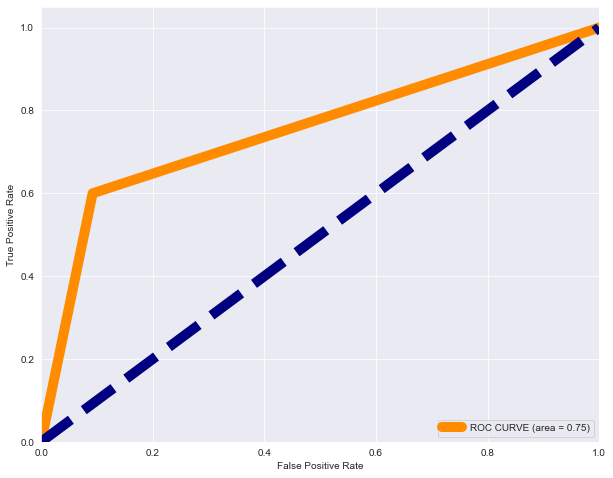

In [47]:
fpr,tpr,thresholds=roc_curve(pred,y_test)
roc_auc =auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### Saving the file

In [48]:
import joblib
joblib.dump(rfc,"rfc.obj")

['rfc.obj']